# Anthony Botello
## Lab 3, PHYS 434 AD

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats, special
from scipy.signal import fftconvolve

# Problem 1

## A)

### 1

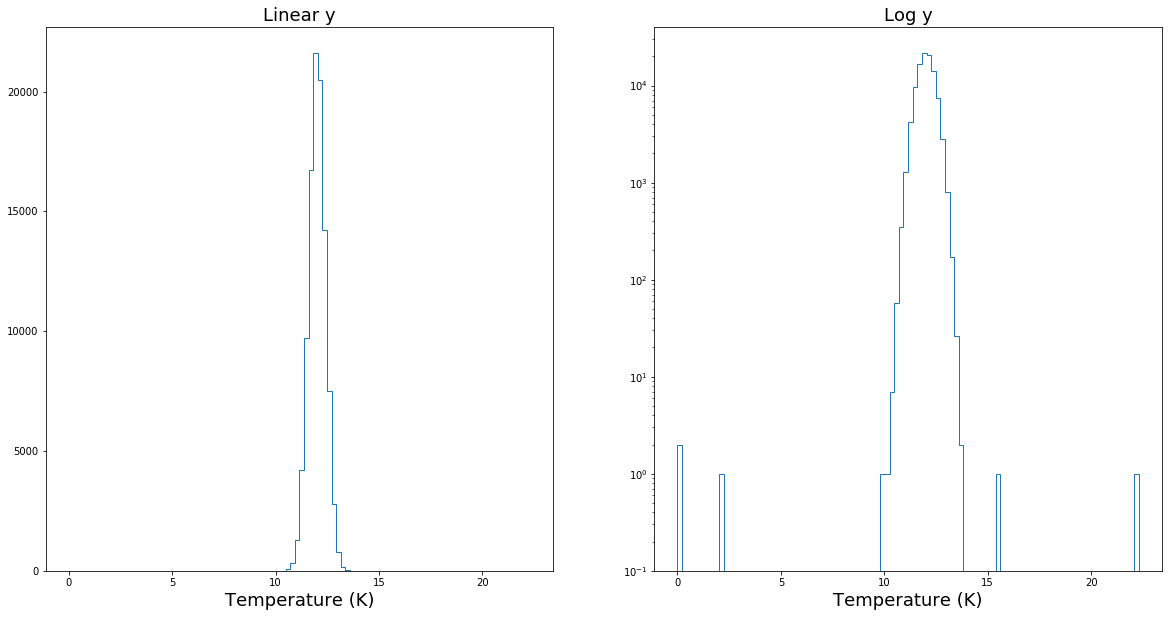

In [2]:
mu = 12.0
std = 0.4
gauss = stats.norm(loc=mu,scale=std)
bg = gauss.rvs(size=100000)
bad = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
temp = np.concatenate((bg,bad))
x = np.linspace(0,25,100008)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(temp,bins=100,histtype='step')
ax[0].set_xlabel('Temperature (K)',fontsize=18)
ax[0].set_title('Linear y',fontsize=18)

ax[1].hist(temp,bins=100,histtype='step',log=True)
ax[1].set_xlabel('Temperature (K)',fontsize=18)
ax[1].set_title('Log y',fontsize=18)
plt.show()

### 2

We have a mostly Gaussian distributed background with a few outliers due to experimental errors. Where should we set our threshold such that if we discard any data beyond this threshold we're not significantly affecting the statistical distribution of our data around the mean? The intuitive choice is $5\sigma$ as this is the threshold for discovery.

### 3

Since our background is Gaussian distributed, and since we have chosen $5\sigma$ as our threshold, we don't need to integrate to calculate probability and then map this probability onto a standard Gaussian. Rather, we simply need to find the subset $P_{good}(X)$ such that all of the measurements are within $5\sigma$ of the mean of 12 K: $$P_{good}(X) = \{P_{bad}(Y) \,|\, \mu - 5\sigma < Y < \mu + 5\sigma\}$$

### 4

We are keeping any data within (less than) 5$\sigma$ of the mean and discarding any data beyond (greater than or equal to) 5$\sigma$ of the mean.

In [3]:
five_sig = 5*std
true_pos = 0
false_neg = 0
true_neg = 0
false_pos = 0

for i in bg:
    if mu - five_sig < i < mu + five_sig:
        true_pos += 1
    else:
        true_neg += 1
        
for i in bad:
    if mu - five_sig < i < mu + five_sig:
        false_pos += 1
    else:
        false_neg += 1
        
print(f'True Pos: {true_pos}')
print(f'True Neg: {true_neg}')
print(f'False Pos: {false_pos}')
print(f'False Neg: {false_neg}')

True Pos: 100000
True Neg: 0
False Pos: 2
False Neg: 6


# B)

By using a threshold of 5$\sigma$ we avoided discarding any 'good' data points. This will be the case most of the time, since, based on the Gaussian statistics of the background, the probability of recording a temperature $5\sigma$ above the mean in a signal-free environment is about 1 in 3.5 million.

## C)

There were 2 'bad' data points within our threshold of 5$\sigma$, one of which was a measurement of 10.3 K and the other of 12.7 K. These mistakes are not avoidable because it's not unreasonable that our background could produce these measurements.

In [4]:
print('Probability of background producing a measurement...')
print(f'Less than or equal to 10.3 K: {gauss.cdf(10.3)}')
print(f'Greater than or equal to 12.7 K: {gauss.sf(12.7)}')

Probability of background producing a measurement...
Less than or equal to 10.3 K: 1.06885257749345e-05
Greater than or equal to 12.7 K: 0.040059156863817225


However, these mistakes are statistically insignificant as they're below the discovery threshold of 5$\sigma$. 

# Problem 2

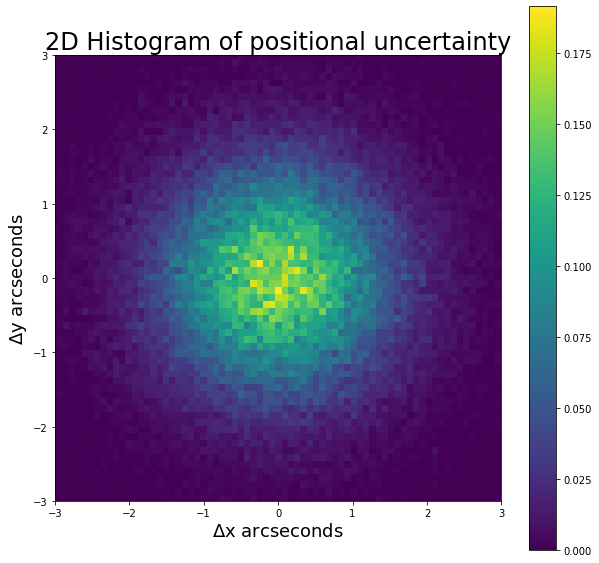

In [5]:
#a = np.concatenate(np.array(stats.norm.rvs( scale = 1, size = 100000)), np.array(stats.norm.rvs( scale = 1, size = 100000)), axis = 1)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1,figsize=(10,10))
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()



## 1

The background distribution of the movement of celestial bodies is a 2-dimensional Gaussian distribution of two correlated random variables $\Delta x$ and $\Delta y$. If an asteroid were to through this region of space, how far would it have to move between images to meet the $5\sigma$ discovery threshold?

## 2

Our background has a bivariate Gaussian distribution with $\mu_x = \mu_y = 0$ and $\sigma_x = \sigma_y = 1$. The PDF of this distribution is 

$$P(\Delta x,\Delta y) = \frac{1}{2\pi\sqrt{1-\rho^2}}\exp\left\{{-\frac{1}{2\left(1-\rho^2\right)}}\left[\Delta x^2+\Delta 
y^2-2\rho \Delta x\Delta y\right]\right\}$$ 

where $\rho$ is the correlation between $\Delta x$ and $\Delta y$.

The probability necessary for a $5\sigma$ discovery is about $2.87\times10^{-7}$. Our goal is to find values $a$ and $b$ such that 

$$\int_{a}^\infty\int_{b}^\infty P(\Delta x,\Delta y) d(\Delta x)d(\Delta y) \approx 2.87\times10^{-7}.$$

The distance the asteroid must travel is then equal to $\Delta r = \sqrt{\Delta x^2 + \Delta y^2}$.


# Problem 3

 ## 1

At an average rate of 1 cosmic ray per minute, collecting data over 15 days for 8 hours each day we expect to detect 7200 cosmic rays. However, over those 15 days we were only able to detect 6800 cosmic rays. There are two possibilities: 1) 400 cosmic rays were absorbed before they reached the Earth; 2) the cosmic ray background did in fact produce only 6800 cosmic rays. It doesn't make sense to ask what the probability of 1) is since we don't have a model for cosmic ray absorption. Therefore, the question we ask is: what is the probability of 2)? 

## 2

Since we are collecting data on discrete events with a known rate of detection the cosmic ray background must be Poisson distributed. Over a 1 minute interval we expect to detect 1 cosmic ray, so the background distribution of a single interval is Poisson($\lambda=1)$. Since the events are random and since each interval is indendendent of the others, the cosmic ray background over the entire 15 day period is simply the sum of each 1-minute background over that period. We can calculate this background by convolving the 1-minute background with itself 7200 times, or we can make use of the fact that the background is Poisson distributed and therefore $$\sum_{i=1}^{7200}Poisson(1) = Poisson(7200).$$

We are choosing the latter method for calculating the background so we can make use of the cdf() function to calculate the probability that the background will produce only 6800 cosmic rays. This effectively integrates the tail of the distribution from $-\infty$ to $6800$.

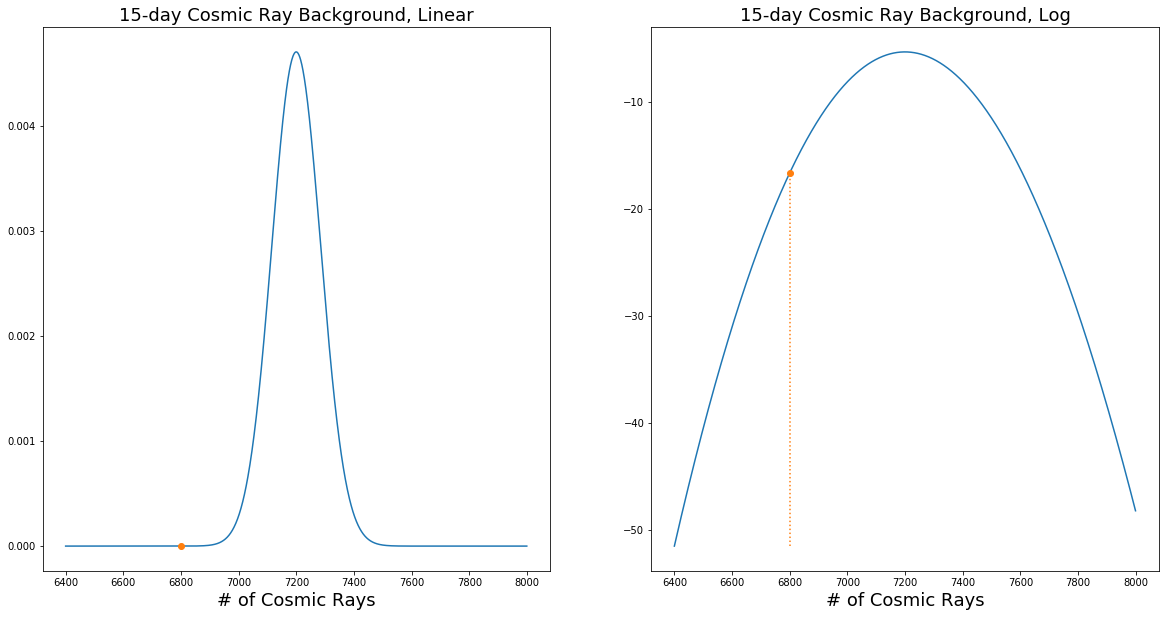

In [6]:
cosmic_bg = stats.poisson(7200)
x = np.arange(6400,8000)

fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(x,cosmic_bg.pmf(x))
ax[0].stem([6800],[cosmic_bg.pmf(6800)],bottom=cosmic_bg.pmf(6400),markerfmt='C1o',linefmt='C1:',use_line_collection=True)
ax[0].set_xlabel('# of Cosmic Rays',fontsize=18)
ax[0].set_title('15-day Cosmic Ray Background, Linear',fontsize=18)

ax[1].plot(x,cosmic_bg.logpmf(x))
ax[1].stem([6800],[cosmic_bg.logpmf(6800)],bottom=cosmic_bg.logpmf(6400),markerfmt='C1o',linefmt='C1:',use_line_collection=True)
ax[1].set_xlabel('# of Cosmic Rays',fontsize=18)
ax[1].set_title('15-day Cosmic Ray Background, Log',fontsize=18)

plt.show()

## 3

In [7]:
prob = cosmic_bg.cdf(6800)
sigma = stats.norm.isf(prob)
print(f'Probability: {prob}\n\'Sigma\':{sigma}')

Probability: 1.0133280183917768e-06
'Sigma':4.750747965777188


As shown above, the probability of the background only producing 6800 cosmic rays over a period of 15 days is about 1 in a million. Therefore, the absorption of 400 cosmic rays by the moon carries a significance of about 4.75$\sigma$.